In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Download the dataset
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#CNN_model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 87ms/step - loss: 0.5840 - accuracy: 0.6805 - val_loss: 0.5095 - val_accuracy: 0.7592
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4514 - accuracy: 0.7824 - val_loss: 0.4933 - val_accuracy: 0.7762
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3454 - accuracy: 0.8455 - val_loss: 0.5355 - val_accuracy: 0.7810
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2208 - accuracy: 0.9083 - val_loss: 0.7617 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1304 - accuracy: 0.9503 - val_loss: 0.9104 - val_accuracy: 0.7886
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0786 - accuracy: 0.9701 - val_loss: 0.9726 - val_accuracy: 0.7742
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0674 - accuracy: 0.9767 - val_loss: 1.1490 - val_accuracy:

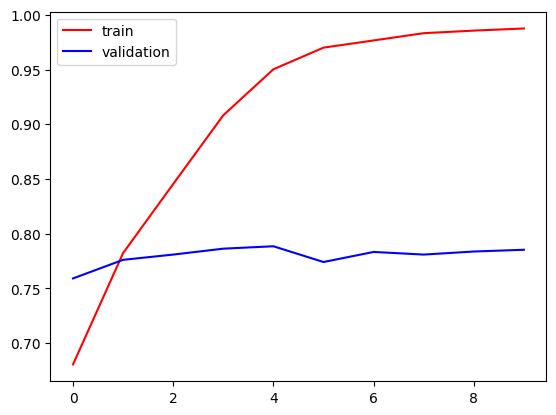

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# without activation
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding="same",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding="same",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 524288)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 130ms/step - loss: 0.8293 - accuracy: 0.6030 - val_loss: 0.5985 - val_accuracy: 0.6664
Epoch 2/10
625/625 [==============================] - 81s 130ms/step - loss: 0.6258 - accuracy: 0.6488 - val_loss: 0.6647 - val_accuracy: 0.6052
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 13.5472 - accuracy: 0.5195 - val_loss: 0.7003 - val_accuracy: 0.5004
Epoch 4/10
625/625 [==============================] - 82s 131ms/step - loss: 0.6943 - accuracy: 0.4945 - val_loss: 0.6928 - val_accuracy: 0.5002
Epoch 5/10
625/625 [==============================] - 80s 127ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6927 - val_accuracy: 0.5002
Epoch 6/10
625/625 [==============================] - 82s 130ms/step - loss: 0.6931 - accuracy: 0.4968 - val_loss: 0.6928 - val_accuracy: 0.5002
Epoch 7/10
625/625 [==============================] - 82s 130ms/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6927 - val_a

In [ ]:
#CNN_model
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 20, 256)      

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 94s 143ms/step - loss: 0.6847 - accuracy: 0.5659 - val_loss: 0.6358 - val_accuracy: 0.6264
Epoch 2/10
625/625 [==============================] - 87s 139ms/step - loss: 0.5996 - accuracy: 0.6724 - val_loss: 0.5357 - val_accuracy: 0.7348
Epoch 3/10
625/625 [==============================] - 89s 142ms/step - loss: 0.4888 - accuracy: 0.7620 - val_loss: 0.4918 - val_accuracy: 0.7612
Epoch 4/10
625/625 [==============================] - 87s 139ms/step - loss: 0.4047 - accuracy: 0.8181 - val_loss: 0.4790 - val_accuracy: 0.7828
Epoch 5/10
625/625 [==============================] - 87s 139ms/step - loss: 0.3143 - accuracy: 0.8644 - val_loss: 0.5344 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 87s 139ms/step - loss: 0.2070 - accuracy: 0.9151 - val_loss: 0.8000 - val_accuracy: 0.7788
Epoch 7/10
625/625 [==============================] - 86s 137ms/step - loss: 0.1276 - accuracy: 0.9520 - val_loss: 0.9923 - val_ac

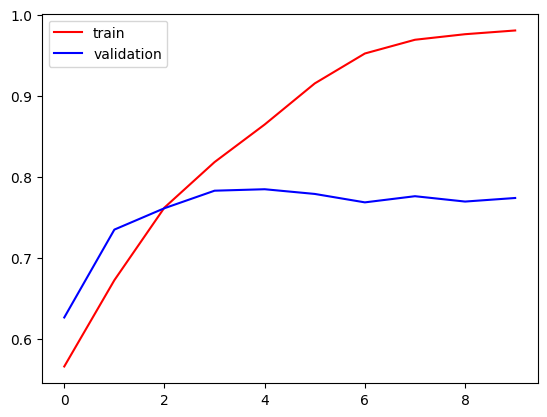

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#CNN_model
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=3))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 127s 194ms/step - loss: 0.6827 - accuracy: 0.6342 - val_loss: 0.6637 - val_accuracy: 0.6176
Epoch 2/10
625/625 [==============================] - 124s 197ms/step - loss: 0.5132 - accuracy: 0.7480 - val_loss: 0.5406 - val_accuracy: 0.7298
Epoch 3/10
625/625 [==============================] - 122s 194ms/step - loss: 0.4209 - accuracy: 0.8075 - val_loss: 0.4503 - val_accuracy: 0.7960
Epoch 4/10
625/625 [==============================] - 121s 193ms/step - loss: 0.3512 - accuracy: 0.8479 - val_loss: 0.6116 - val_accuracy: 0.7364
Epoch 5/10
625/625 [==============================] - 123s 196ms/step - loss: 0.2686 - accuracy: 0.8896 - val_loss: 0.4985 - val_accuracy: 0.7852
Epoch 6/10
625/625 [==============================] - 123s 196ms/step - loss: 0.1956 - accuracy: 0.9207 - val_loss: 0.4538 - val_accuracy: 0.8160
Epoch 7/10
625/625 [==============================] - 120s 192ms/step - loss: 0.1443 - accuracy: 0.9439 - val_loss: 0.5209 -

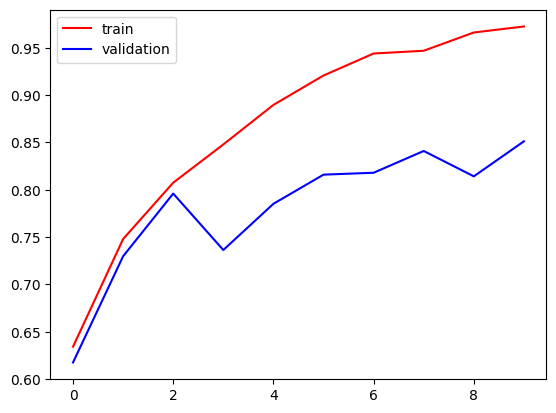

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()